In [1]:
%load_ext autoreload

%autoreload 2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from voltage_clamp import IV, Hinf
import os
import seaborn as sns

In [2]:
iv_path = r'D:\Lab\Patch Clamp\1063 new\VC\IV'

In [3]:
parameters = pd.read_excel('Parameters_VC.xlsx')

D:\Lab\Patch Clamp\1063 new\VC\IV\14dpi\2022-04-11_001_5.asc
[4.37]


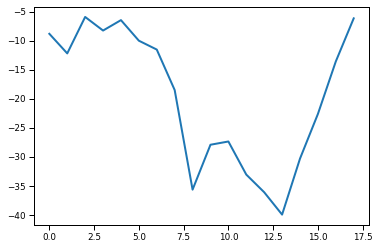

D:\Lab\Patch Clamp\1063 new\VC\IV\14dpi\2022-04-11_001_6.asc
[4.27]


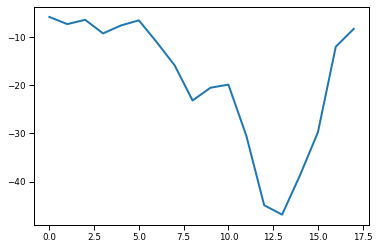

D:\Lab\Patch Clamp\1063 new\VC\IV\14dpi\2022-04-11_001_7.asc
[3.52]


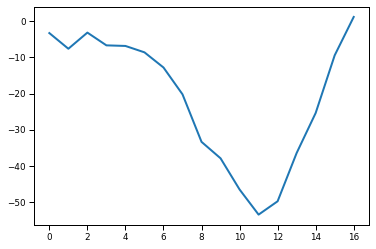

D:\Lab\Patch Clamp\1063 new\VC\IV\14dpi\2022-04-11_001_8.asc
[2.99]


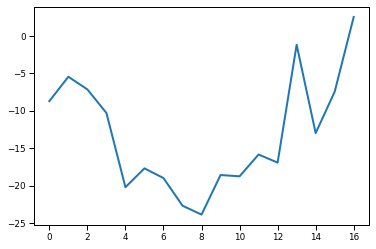

D:\Lab\Patch Clamp\1063 new\VC\IV\14dpi\2022-04-11_001_9.asc
[3.38]


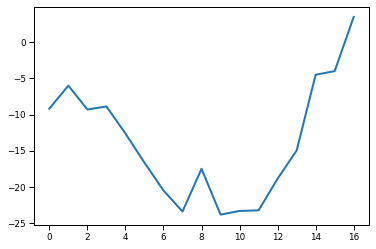

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-04-05_001_12.asc
[4.61]


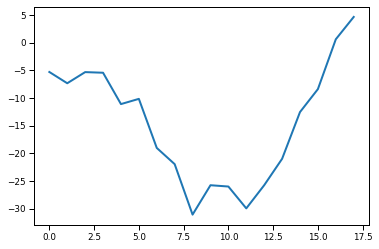

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-04-05_001_2.asc
[2.9]


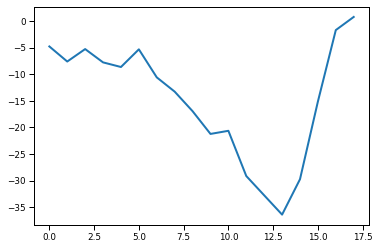

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-04-05_001_3.asc
[2.99]


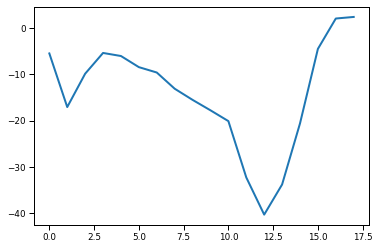

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-04-05_001_4.asc
[4.25]


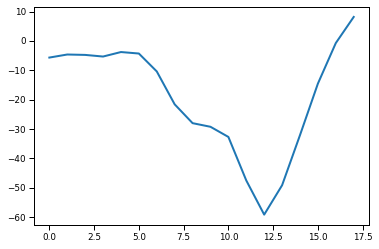

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-04-05_001_5.asc
[2.32]


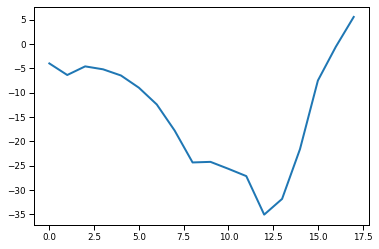

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-04-05_001_6.asc
[6.37]


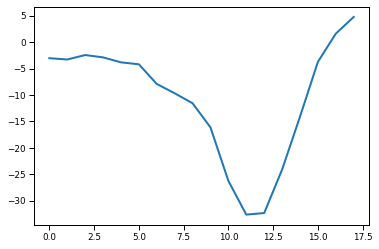

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-04-05_001_7.asc
[4.34]


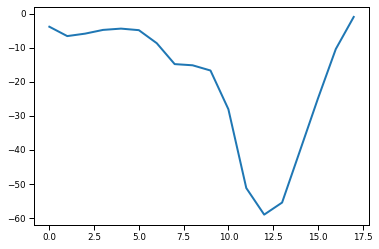

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-04-05_001_8.asc
[4.52]


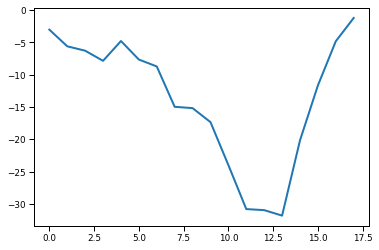

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-06-01_001_2.asc
[3.95]


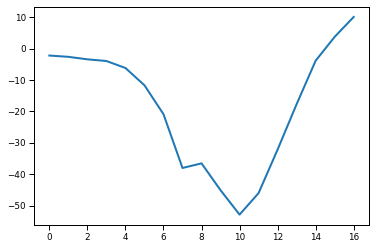

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-06-01_001_4.asc
[5.59]


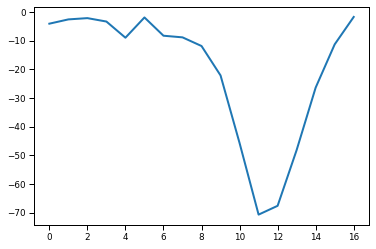

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-06-01_001_5.asc
[4.14]


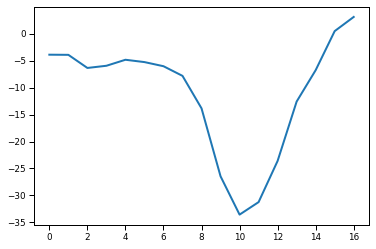

D:\Lab\Patch Clamp\1063 new\VC\IV\15dpi\2022-06-01_001_6.asc
[2.82]


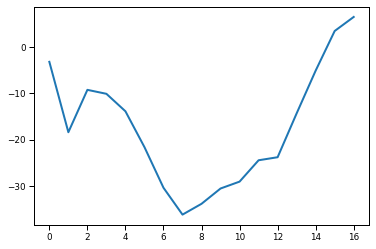

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-04-06_001_18.asc
[6.43]


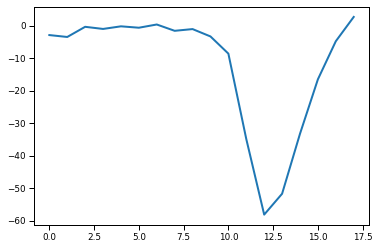

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-04-06_001_20.asc
[2.17]


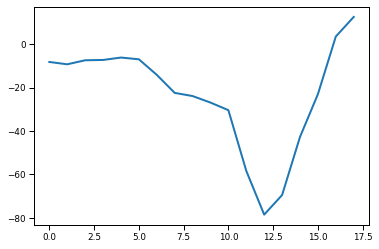

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-04-06_001_21.asc
[5.51]


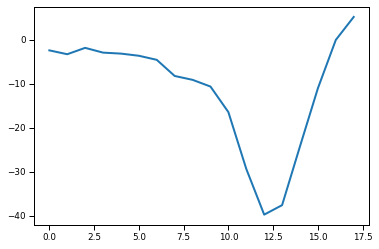

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-04-06_001_22.asc
[4.85]


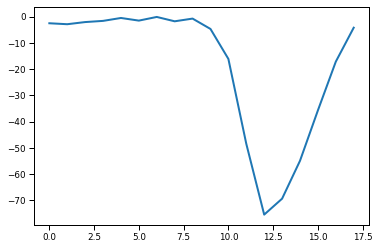

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-04-06_001_23.asc
[7.39]


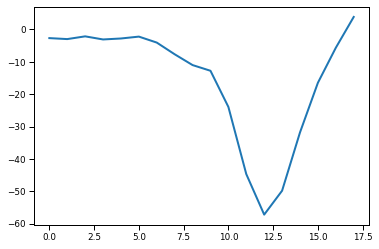

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-04-06_001_24.asc
[2.98]


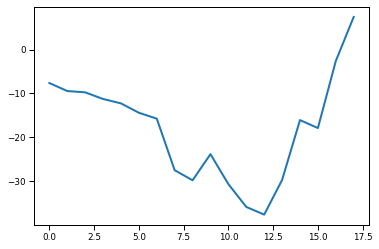

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-06-02_001_02.asc
[3.51]


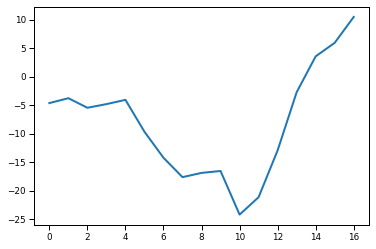

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-06-02_001_03.asc
[4.36]


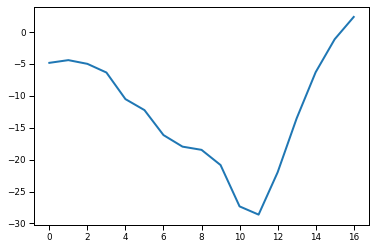

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-06-02_001_04.asc
[1.82]


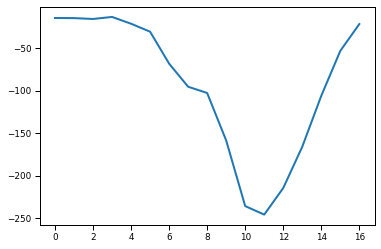

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-06-02_001_05.asc
[3.62]


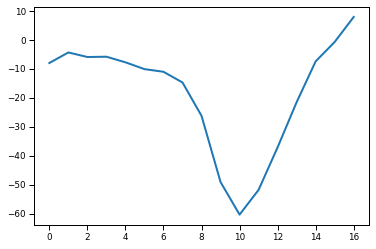

D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-06-02_001_06.asc
[4.11]


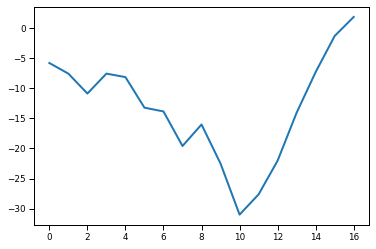

D:\Lab\Patch Clamp\1063 new\VC\IV\17dpi\2022-04-07_001_11.asc
[2.73]


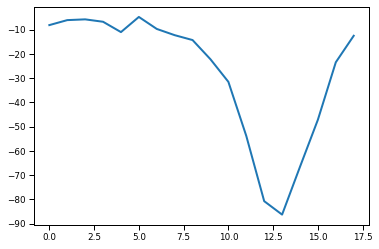

D:\Lab\Patch Clamp\1063 new\VC\IV\17dpi\2022-04-07_001_12.asc
[2.52]


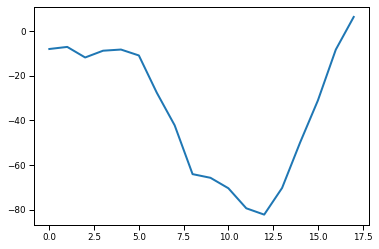

D:\Lab\Patch Clamp\1063 new\VC\IV\17dpi\2022-04-07_001_13.asc
[4.55]


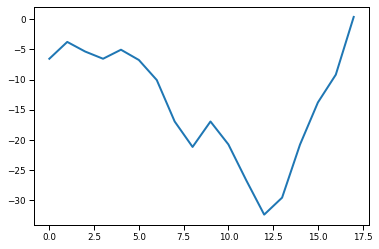

D:\Lab\Patch Clamp\1063 new\VC\IV\17dpi\2022-04-07_001_14.asc
[4.38]


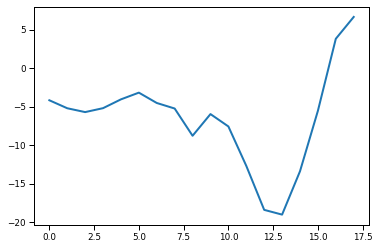

In [31]:
iv_currents = []
for root, dirs, files in os.walk(iv_path):
    if 'dpi' in root:
        for file in files:
            filepath = os.path.join(root, file)
            print(filepath)
            iv = IV(filepath)
            #iv.plot_iv()
            capacitance = parameters[parameters['filename']==file]['C-slow (pF)'].values
            print(capacitance)
            if capacitance > 2:
                if len(iv.iv_current) == 18:
                    iv_currents.append(list(iv.iv_current[1:]/capacitance[0]))
                else:
                    iv_currents.append(list(iv.iv_current/capacitance[0]))
                plt.plot(iv.iv_current/capacitance[0])
            else:
                plt.plot(iv.iv_current)
            plt.show()
iv_voltage = np.int8(iv.iv_voltage[1:])

In [66]:
iv = IV(r'D:\Lab\Patch Clamp\1063 new\VC\IV\16dpi\2022-06-02_001_04.asc')

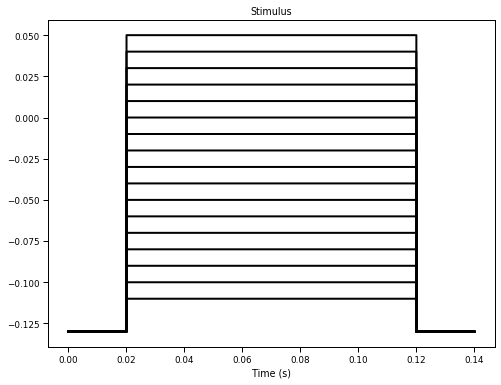

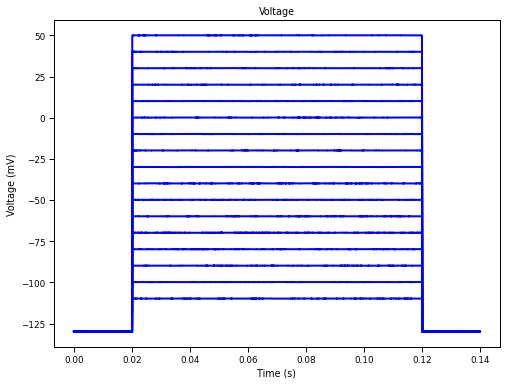

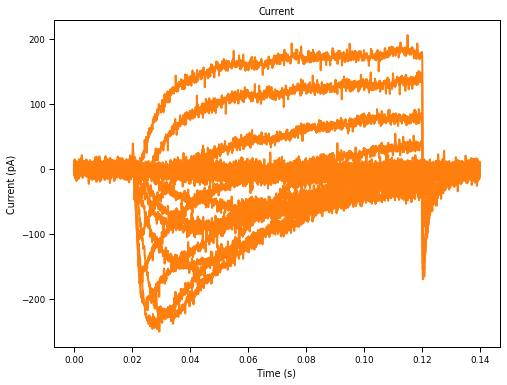

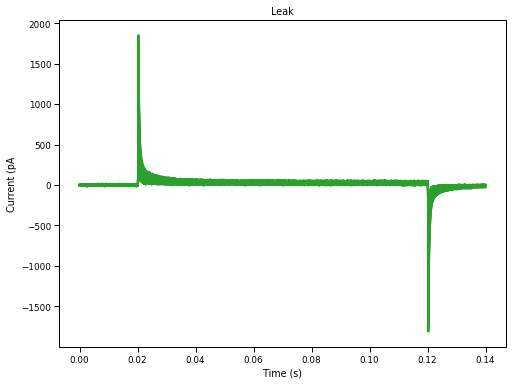

In [67]:
iv.plot()

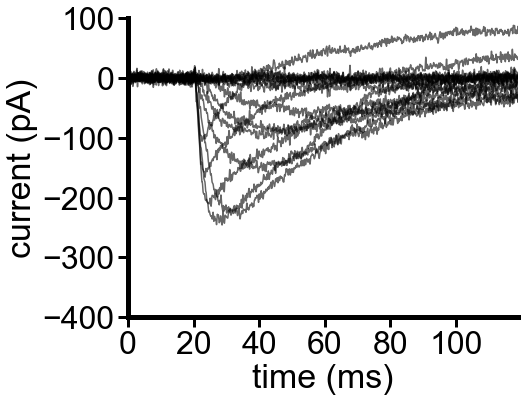

In [130]:
plt.figure(figsize=(7,5.5))

for trace in iv.current_filtered[0:15]:
    plt.plot(iv.time[0,:]*1000,trace, c='k', alpha = 0.6, linewidth=1.5)
    
ax = plt.gca()

## limit x-Achse and y-Achse
ax.set_xlim([0, 119])
ax.set_ylim([-400, 100])

## remove or define lines of achses
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)

## define ticks at both axes
ax.tick_params(length=10, width=3)

## define tick labels at both axes
plt.xticks(fontsize=32, fontname='Arial')
plt.yticks(fontsize=32, fontname='Arial')

## define x and x labels
plt.xlabel('time (ms)', fontsize=34, fontname='Arial')
plt.ylabel('current (pA)', fontsize=34,fontname='Arial')

## save figure
plt.savefig('IV_currents_example.png', bbox_inches = "tight")

plt.show()

0.03


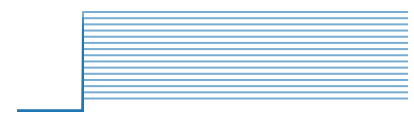

In [127]:
plt.figure(figsize=(7,2))

for trace in iv.stimulus[0:15]:
    plt.plot(iv.time[0,:]*1000,trace, c='C0', alpha = 0.6, linewidth=2)
print(trace.max())    
    
ax = plt.gca()

## limit x-Achse and y-Achse
ax.set_xlim([0, 119])
#ax.set_ylim([-2700, 200])

## remove or define lines of achses
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(False)
ax.spines['bottom'].set_linewidth(False)

## define ticks at both axes
ax.tick_params(length=10, width=3)

## define tick labels at both axes
plt.xticks(fontsize=20, fontname='Arial')
plt.yticks(fontsize=20, fontname='Arial')

## define x and x labels
plt.xlabel('Time (ms)', fontsize=24, fontname='Arial')
plt.ylabel('Current (pA)', fontsize=24,fontname='Arial')

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

## save figure
plt.savefig('IV_voltage_example.png', bbox_inches = "tight")

plt.show()

In [79]:
iv.stimulus[14].max()

0.03

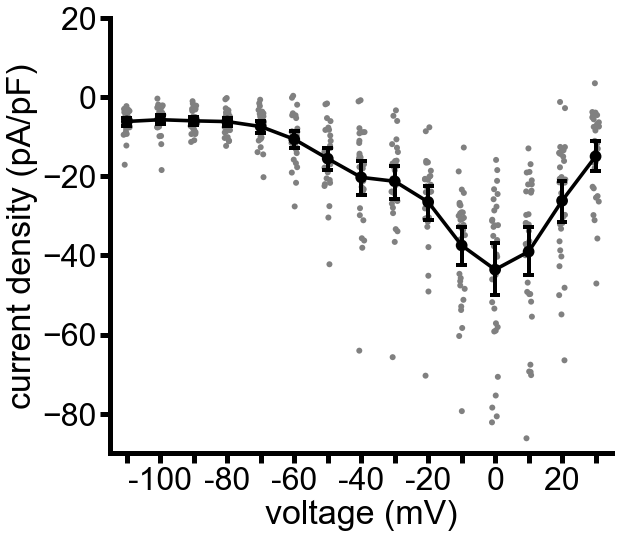

In [124]:
plt.figure(figsize=(9,8))

ax = plt.gca()
#ax.set_xlim([-10,0])
ax.set_ylim([-90, 20])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.tick_params(length=10, width=5)
plt.xticks(fontsize=32, fontname='Arial')
plt.yticks(fontsize=32, fontname='Arial')
paper_rc = {'lines.linewidth': 2, 'lines.markersize': 1}                  
sns.set_context("paper", rc = paper_rc) 

sns.stripplot(data=np.array(iv_currents)[:,:15], color='gray', zorder=0, size=6)
sns.pointplot(data=np.array(iv_currents)[:,:15], capsize=.2, color='k', zorder=1, errwidth=4)
ax.set_xticklabels(iv_voltage[:15], fontname="Arial", fontsize=32)

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)


plt.xlabel('voltage (mV)', fontsize=34, fontname='Arial')
plt.ylabel('current density (pA/pF)', fontsize=34,fontname='Arial')


plt.savefig('IV_with_dots.png', bbox_inches = "tight")  
plt.show()

In [131]:
len(iv_currents)

31

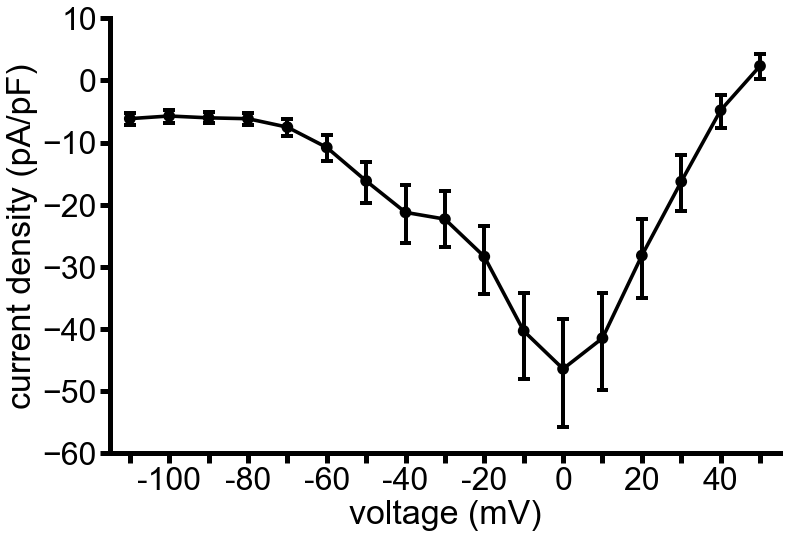

In [11]:
plt.figure(figsize=(12,8))

ax = plt.gca()
#ax.set_xlim([-10,0])
ax.set_ylim([-60, 10])

ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines['left'].set_linewidth(5)
ax.spines['bottom'].set_linewidth(5)
ax.tick_params(length=10, width=5)
plt.xticks(fontsize=32, fontname='Arial')
plt.yticks(fontsize=32, fontname='Arial')
paper_rc = {'lines.linewidth': 2, 'lines.markersize': 1}                  
sns.set_context("paper", rc = paper_rc) 

#sns.stripplot(data=np.array(iv_currents), color='gray', zorder=0)
sns.pointplot(data=np.array(iv_currents), capsize=.2, color='k', zorder=1, errwidth=4)
ax.set_xticklabels(iv_voltage, fontname="Arial", fontsize=32)

for label in ax.xaxis.get_ticklabels()[::2]:
    label.set_visible(False)




plt.xlabel('voltage (mV)', fontsize=34, fontname='Arial')
plt.ylabel('current density (pA/pF)', fontsize=34,fontname='Arial')


plt.savefig('IV_all.png', bbox_inches = "tight")  
plt.show()